In [1]:
import os
os.chdir('/mnt/nas4/diskl/MMG/Data/MMG-R1/CSAW_1')

In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The dataset contains x-ray images, mammography, from breast cancer screening at the Karolinska University Hospital, Stockholm, Sweden, collected by principal investigator Fredrik Strand at Karolinska Institutet. The purpose for the use of the dataset shall be to perform breast cancer research to improve screening, diagnostics and prognostics of breast cancer. 1103 cases of first-time breast cancer for women in the screening age range (40-74 years) during the included time period (November 2008 to December 2015) were included. A random selection of 10,000 healthy controls during the same time period were included. For each individual all screening mammograms, also repeated over time, were included; as well as the date of screening and the age. In addition, there are pixel-level annotations of the tumors created by breast radiologist Dr Karin Dembrower (small lesions such as micro-calcifications have been annotated as an area). Annotations were also drawn in mammograms prior to diagnosis; if these contain a single pixel it means no cancer was seen but the estimated location of the center of the future cancer was shown by a single pixel annotation. In addition to images, the dataset also contains cancer data created at the Karolinska University Hospital and extracted through the Regional Cancer Center Stockholm-Gotland. This data contains information about the time of diagnosis and cancer characteristics including tumor size, histology and lymph node metastasis. The precision of non-image data was decreased, through categorisation and jittering, to ensure that no single individual can be identified.

该数据集包含来自瑞典斯德哥尔摩卡罗林斯卡大学医院乳腺癌筛查的 X 射线图像、乳房 X 光检查，由卡罗林斯卡学院的首席研究员 Fredrik Strand 收集。使用数据集的目的是进行乳腺癌研究，以改进乳腺癌的筛查、诊断和预后。纳入研究期间（2008 年 11 月至 2015 年 12 月）筛查年龄范围（40-74 岁）的女性首次乳腺癌病例 1103 例。包括在同一时间段内随机选择的 10,000 名健康对照。每个人的所有筛查乳房 X 线照片，也随着时间的推移而重复，都包括在内；以及筛选日期和年龄。此外，还有乳腺放射科医生 Karin Dembrower 博士创建的肿瘤像素级注释（微钙化等小病灶已被注释为一个区域）。诊断前在乳房 X 线照片中也绘制了注释；如果这些包含单个像素，则表示没有看到癌症，但未来癌症中心的估计位置由单个像素注释显示。除了图像，该数据集还包含在卡罗林斯卡大学医院创建并通过斯德哥尔摩-哥特兰地区癌症中心提取的癌症数据。该数据包含有关诊断时间和癌症特征的信息，包括肿瘤大小、组织学和淋巴结转移。通过分类和抖动，降低非图像数据的精度，以确保无法识别单个个体。

## Load csv data

In [3]:
csaw_df = pd.read_csv('anon_dataset_nonhidden_211125.csv')
csaw_df.head()

,anon_patientid,exam_year,anon_filename,x_age,x_case,x_cancer_laterality,x_type,x_lymphnode_met,rad_timing,rad_r1,rad_r2,rad_recall,rad_recall_type_right,rad_recall_type_left,imagelaterality,viewposition,libra_breastarea,libra_densearea,libra_percentdensity
0,2,2015,00002_20990909_L_CC_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,Left,CC,127.25809,29.595217,23.256058
1,2,2015,00002_20990909_L_MLO_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,Left,MLO,122.31812,39.298000,32.127705
2,2,2015,00002_20990909_R_CC_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,Right,CC,114.57063,23.637600,20.631468
3,2,2015,00002_20990909_R_MLO_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,Right,MLO,133.20238,36.162785,27.148750
4,4,2012,00004_20990909_R_CC_1.dcm,1,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,Right,CC,201.18773,68.998276,34.295467


In [4]:

print("Total patients ==>",len(csaw_df.anon_patientid.unique()))
print("Total images ==>",len(csaw_df))

Total patients ==> 8723
Total images ==> 98788


In [5]:
## fullfill missing data
csaw_df['x_cancer_laterality'] = csaw_df['x_cancer_laterality'].fillna(value='NULL')
csaw_df['x_type'] = csaw_df['x_type'].fillna(value=0)
csaw_df['x_lymphnode_met'] = csaw_df['x_lymphnode_met'].fillna(value=-1)
csaw_df['rad_timing'] = csaw_df['rad_timing'].fillna(value=0)
csaw_df['rad_r1'] = csaw_df['rad_r1'].fillna(value=0)
csaw_df['rad_r2'] = csaw_df['rad_r2'].fillna(value=0)
csaw_df['rad_recall_type_right'] = csaw_df['rad_recall_type_right'].fillna(value=0)
csaw_df['rad_recall_type_left'] = csaw_df['rad_recall_type_left'].fillna(value=0)

In [6]:
print(csaw_df[csaw_df.x_cancer_laterality=='Left'].count()[-1], csaw_df[csaw_df.x_cancer_laterality=='Right'].count()[-1],  csaw_df[csaw_df.x_cancer_laterality=='NULL'].count()[-1])

3832 3472 91484


In [ ]:
csaw_df

## Data summary

### [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

In [7]:
csaw_df.corr(method='pearson')

,anon_patientid,exam_year,x_age,x_case,x_type,x_lymphnode_met,rad_timing,rad_r1,rad_r2,rad_recall,rad_recall_type_right,rad_recall_type_left,libra_breastarea,libra_densearea,libra_percentdensity
anon_patientid,1.000000,0.125232,0.007861,0.056972,0.054421,0.048280,0.032865,0.028332,0.027669,0.048174,0.031627,0.015887,-0.023875,-0.006207,0.016392
exam_year,0.125232,1.000000,0.085432,-0.107410,-0.103761,-0.098995,-0.141293,-0.052860,-0.044588,-0.004789,-0.024236,-0.020046,-0.012404,-0.068741,-0.037685
x_age,0.007861,0.085432,1.000000,0.078440,0.076033,0.058929,0.064229,-0.017571,-0.001666,0.022193,-0.004586,0.014495,0.154930,-0.138530,-0.219170
x_case,0.056972,-0.107410,0.078440,1.000000,0.949488,0.901377,0.928035,0.281708,0.303546,0.373997,0.218952,0.221680,0.034803,0.044915,0.010570
x_type,0.054421,-0.103761,0.076033,0.949488,1.000000,0.913541,0.878150,0.266755,0.283253,0.352237,0.207401,0.212258,0.039850,0.043756,0.006843
x_lymphnode_met,0.048280,-0.098995,0.058929,0.901377,0.913541,1.000000,0.832317,0.249494,0.269618,0.332179,0.197351,0.200719,0.031311,0.042280,0.011894
rad_timing,0.032865,-0.141293,0.064229,0.928035,0.878150,0.832317,1.000000,0.139894,0.150423,0.157102,0.092978,0.101506,0.028407,0.049732,0.017776
rad_r1,0.028332,-0.052860,-0.017571,0.281708,0.266755,0.249494,0.139894,1.000000,0.677558,0.687148,0.462279,0.463717,0.007428,0.031239,0.015438
rad_r2,0.027669,-0.044588,-0.001666,0.303546,0.283253,0.269618,0.150423,0.677558,1.000000,0.755951,0.499392,0.527278,0.009459,0.027429,0.010041
rad_recall,0.048174,-0.004789,0.022193,0.373997,0.352237,0.332179,0.157102,0.687148,0.755951,1.000000,0.660342,0.702804,0.009049,0.017078,0.005079


### [Kendall correlation](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient)

In [8]:
csaw_df.corr(method='kendall')

/home/xumingjie/miniconda3/envs/open-mmlab/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4868: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


,anon_patientid,exam_year,x_age,x_case,x_type,x_lymphnode_met,rad_timing,rad_r1,rad_r2,rad_recall,rad_recall_type_right,rad_recall_type_left,libra_breastarea,libra_densearea,libra_percentdensity
anon_patientid,1.000000,0.081371,0.010343,0.043453,0.041614,0.039183,0.041339,0.021505,0.020650,0.036069,0.027271,0.013354,-0.014983,-0.003271,0.007853
exam_year,0.081371,1.000000,0.073994,-0.092842,-0.089673,-0.087555,-0.095646,-0.044632,-0.037574,-0.004555,-0.021394,-0.017291,-0.009328,-0.058625,-0.036731
x_age,0.010343,0.073994,1.000000,0.078440,0.077689,0.074666,0.076798,-0.017571,-0.001666,0.022193,0.003456,0.021910,0.141254,-0.142890,-0.187777
x_case,0.043453,-0.092842,0.078440,1.000000,0.977916,0.951941,0.988717,0.281708,0.303546,0.373997,0.255188,0.256955,0.029902,0.035635,0.010050
x_type,0.041614,-0.089673,0.077689,0.977916,1.000000,0.949506,0.966311,0.278511,0.297513,0.369254,0.250260,0.255373,0.030835,0.033862,0.007961
x_lymphnode_met,0.039183,-0.087555,0.074666,0.951941,0.949506,1.000000,0.940623,0.270429,0.289519,0.360645,0.244379,0.249755,0.028536,0.033483,0.008709
rad_timing,0.041339,-0.095646,0.076798,0.988717,0.966311,0.940623,1.000000,0.266308,0.286947,0.349655,0.239116,0.241945,0.029298,0.035894,0.010584
rad_r1,0.021505,-0.044632,-0.017571,0.281708,0.278511,0.270429,0.266308,1.000000,0.677558,0.687148,0.488693,0.490909,0.007027,0.027577,0.015627
rad_r2,0.020650,-0.037574,-0.001666,0.303546,0.297513,0.289519,0.286947,0.677558,1.000000,0.755951,0.525455,0.555724,0.009525,0.025593,0.011971
rad_recall,0.036069,-0.004555,0.022193,0.373997,0.369254,0.360645,0.349655,0.687148,0.755951,1.000000,0.692289,0.737017,0.008689,0.016145,0.005159


### Summary table
| Col Name              | Explaination                                                                                                                | Data range              | Pearson correlation with x_case | Kendall correlation with x_case | Remarks                                                                                          |   |
|-----------------------|-----------------------------------------------------------------------------------------------------------------------------|-------------------------|---------------------------------|---------------------------------|--------------------------------------------------------------------------------------------------|---|
| anon_patientid        | anonymous patient ID                                                                                                        | [2,11303]               | N.A.                            | N.A.                            | Totally 8723 patients annd 98788 images.<br>In those patients, 7850 are healthy, 873 are cancer. |   |
| exam_year             | year of the mammography exam                                                                                                | [2008,2016]             | N.A.                            | N.A.                            |                                                                                                  |   |
| anon_filename         | mammogram image file                                                                                                        | N.A.                    | N.A.                            | N.A.                            |                                                                                                  |   |
| x_age                 | 1=40-55 years of age at mammography <br>2=55+ years of age at mammography                                                   | [1,2]                   | 0.078440                        | 0.078440                        | Some patients have different x_age classes during the study time                                 |   |
| x_case                | 0=no cancer during study time<br>1=cancer during study time (see rad_timing below)                                          | [0,1]                   | 1.000000                        | 1.000000                        |                                                                                                  |   |
| x_cancer_laterality   | left = cancer diagnosed in left breast<br>right = cancer diagnosed in right breast                                          | [NULL, Left, Right]     | N.A.                            | N.A.                            | The healthy group will be marked as NULL                                                         |   |
| x_type                | 1=in situ only<br>2=invasive <=15 mm<br>3=invasive >15 mm                                                                   | [0,1,2,3]               | 0.949488                        | 0.977916                        | The healthy group will be marked as 0.                                                           |   |
| x_lymphnode_met       | 0=no<br>1=yes                                                                                                               | [-1,0,1]                | 0.901377                        | 0.951941                        | The healthy group will be marked as -1                                                           |   |
| rad_timing            | 1=<60 days from screening to diagnosis (screen-detected cancer)<br>2=60-729 days (interval cancer)<br>3=730+ (priors/other) | [0,1,2,3]               | 0.928035                        | 0.988717                        | The healthy group will be marked as 0.                                                           |   |
| rad_r1                | 0=healthy<br>1=discuss                                                                                                      | [0,1]                   | 0.281708                        | 0.281708                        | The healthy group will be marked as 0.                                                           |   |
| rad_r2                | 0=healthy<br>1=discuss                                                                                                      | [0,1]                   | 0.303546                        | 0.303546                        | The healthy group will be marked as 0.                                                           |   |
| rad_recall            | 0=normal<br>1=recall                                                                                                        | [0,1]                   | 0.373997                        | 0.373997                        | The healthy group will be marked as 0.                                                           |   |
| rad_recall_type_right | 1=radiological<br>2=symptomatic                                                                                             | [0,1,2]                 | 0.218952                        | 0.255188                        | The healthy group will be marked as 0.                                                           |   |
| rad_recall_type_left  | 1=radiological<br>2=symptomatic                                                                                             | [0,1,2]                 | 0.221680                        | 0.256955                        | The healthy group will be marked as 0.                                                           |   |
| imagelaterality       | left = image of left breast<br>right = image of right breast                                                                | [Left, Right]           | N.A.                            | N.A.                            |                                                                                                  |   |
| viewposition          | cc = craniocaudal projection<br>mlo = mediolateral oblique projection                                                       | [CC, MLO]               | N.A.                            | N.A.                            |                                                                                                  |   |
| libra_breastarea      | Breast area in cm2                                                                                                          | [25.621904, 601.10144]  | 0.034803                        | 0.029902                        |                                                                                                  |   |
| libra_densearea       | Dense area in cm2                                                                                                           | [1.553888, 218.80656]   | 0.044915                        | 0.035635                        |                                                                                                  |   |
| libra_percentdensity  | Percent density estimated by the Libra software                                                                             | [0.67153603, 96.554916] | 0.010570                        | 0.010050                        |                                                                                                  |   |

## Group data into exam level and patient level

### Exam level table

In [9]:
csaw_df_exam_level = csaw_df[['anon_patientid',	
              'exam_year',
              'x_age',	
              'x_case',	
              'x_cancer_laterality',	
              'x_type',	
              'x_lymphnode_met',	
              'rad_timing',	
              'rad_r1',	
              'rad_r2',	
              'rad_recall',	
              'rad_recall_type_right',	
              'rad_recall_type_left'
            ]].groupby(['anon_patientid','exam_year']).agg(
              x_case = ('x_case', 'max'),
              x_age = ('x_age','max'),
              x_cancer_laterality = ('x_cancer_laterality','max'),
              x_type = ('x_type','min'),
              x_lymphnode_met = ('x_lymphnode_met','max'),
              rad_timing = ('rad_timing','min'),
              rad_r1 = ('rad_r1','max'),
              rad_r2 = ('rad_r2','max'),
              rad_recall = ('rad_recall','max'),
              rad_recall_type_right = ('rad_recall_type_right','max'),
              rad_recall_type_left = ('rad_recall_type_left','max')
            ).reset_index()
csaw_df_exam_level

,anon_patientid,exam_year,x_case,x_age,x_cancer_laterality,x_type,x_lymphnode_met,rad_timing,rad_r1,rad_r2,rad_recall,rad_recall_type_right,rad_recall_type_left
0,2,2015,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,4,2012,0,1,NULL,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,2014,0,1,NULL,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,2009,0,2,NULL,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2011,0,2,NULL,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24689,11298,2015,0,1,NULL,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
24690,11299,2015,0,1,NULL,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
24691,11300,2015,0,2,NULL,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
24692,11301,2015,0,1,NULL,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Patient level table

In [10]:
# keep the latest exam one
csaw_df_patient_level = csaw_df_exam_level[['anon_patientid',
                'exam_year',
                'x_age',
                'x_case',
                'x_cancer_laterality',
                'rad_timing']].groupby(['anon_patientid']).agg(
                    x_case = ('x_case', 'max'),
                    x_age = ('x_age','max'),
                    x_cancer_laterality = ('x_cancer_laterality','max'),
                    rad_timing = ('rad_timing','min'),
                    year_count = ('exam_year','count'),
                    max_year = ('exam_year','max'),
                    min_year = ('exam_year','min'),
                    ).reset_index()
csaw_df_patient_level['duration'] = csaw_df_patient_level['max_year']-csaw_df_patient_level['min_year']+1
csaw_df_patient_level

,anon_patientid,x_case,x_age,x_cancer_laterality,rad_timing,year_count,max_year,min_year,duration
0,2,1,1,Left,2.0,1,2015,2015,1
1,4,0,1,NULL,0.0,2,2014,2012,3
2,5,0,2,NULL,0.0,4,2016,2009,8
3,6,0,1,NULL,0.0,4,2015,2009,7
4,7,0,1,NULL,0.0,4,2015,2010,6
...,...,...,...,...,...,...,...,...,...
8718,11298,0,1,NULL,0.0,1,2015,2015,1
8719,11299,0,1,NULL,0.0,1,2015,2015,1
8720,11300,0,2,NULL,0.0,1,2015,2015,1
8721,11301,0,1,NULL,0.0,1,2015,2015,1


## Figures

In [11]:
def count_exams(patient_level:pd.DataFrame,d_range = 10):
  counts = []
  for i in range(1, d_range):
    counts.append(patient_level[patient_level.year_count == i].count()[-1])
  return counts

def count_durations(patient_level:pd.DataFrame,d_range = 10):
  counts = []
  for i in range(1, d_range):
    counts.append(patient_level[patient_level.duration == i].count()[-1])
  return counts


In [12]:
def plot_bar_chart(label_list,objs,total_width = 0.8, xlabel = None, ylabel = None, title = None):
  x = np.arange(len(label_list))
  n = len(objs)
  width = total_width / n
  x = x - (total_width - width) / 2
  for idx,obj in enumerate(objs):
    plt.bar(x + idx*width, obj['ary'],  width=width, label=obj['label'])
  plt.xticks(x,label_list)
  if xlabel is not None:
    plt.xlabel(xlabel)
  if ylabel is not None:
    plt.ylabel(ylabel)
  if title is not None:
    plt.title(title)
  plt.legend()
  plt.show()

### Cancer distribution

cancer ==>
0    7850
1     873
Name: x_case, dtype: int64


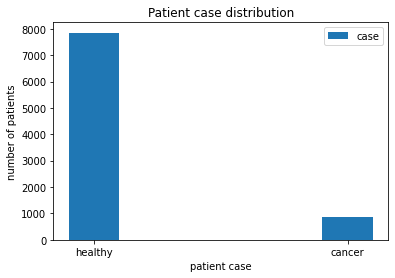

In [13]:
print("cancer ==>")
print(csaw_df_patient_level['x_case'].value_counts())
cancer_label_list = ['healthy','cancer']
cancer = {
    'ary':[csaw_df_patient_level[csaw_df_patient_level.x_case== 0].count()[-1],csaw_df_patient_level[csaw_df_patient_level.x_case == 1].count()[-1]],
    'label':'case'
}
plot_bar_chart(cancer_label_list,[cancer],total_width = 0.2,xlabel="patient case",ylabel="number of patients", title = "Patient case distribution")

### Age distribution

age ==>
2    4551
1    4172
Name: x_age, dtype: int64


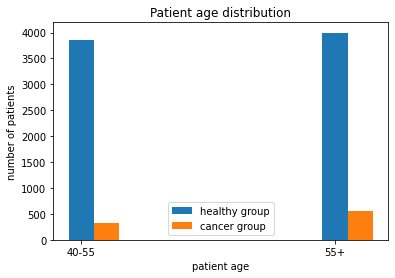

In [14]:
print("age ==>")
print(csaw_df_patient_level['x_age'].value_counts())

age_label_list = ['40-55','55+']
health_age = {
    'ary':[csaw_df_patient_level[(csaw_df_patient_level.x_case == 0) & (csaw_df_patient_level.x_age== 1)].count()[-1],csaw_df_patient_level[(csaw_df_patient_level.x_case == 0) & (csaw_df_patient_level.x_age == 2)].count()[-1]],
    'label':'healthy group'
}

cancer_age = {
    'ary':[csaw_df_patient_level[(csaw_df_patient_level.x_case == 1) & (csaw_df_patient_level.x_age== 1)].count()[-1],csaw_df_patient_level[(csaw_df_patient_level.x_case == 1) & (csaw_df_patient_level.x_age == 2)].count()[-1]],
    'label':'cancer group'
}

plot_bar_chart(age_label_list,[health_age,cancer_age],total_width = 0.2,xlabel="patient age",ylabel="number of patients", title = "Patient age distribution")

### Laterality distribution in cancer group

cancer laterality ==>
NULL     7850
Left      447
Right     426
Name: x_cancer_laterality, dtype: int64


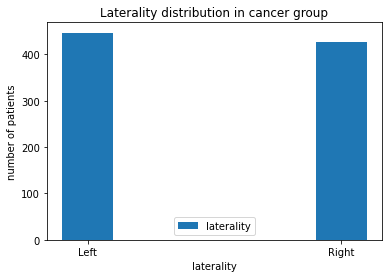

In [15]:
print("cancer laterality ==>")
print(csaw_df_patient_level['x_cancer_laterality'].value_counts())
laterality_label_list = ['Left','Right']
laterality = {
    'ary':[csaw_df_patient_level[csaw_df_patient_level.x_cancer_laterality== 'Left'].count()[-1],csaw_df_patient_level[csaw_df_patient_level.x_cancer_laterality == 'Right'].count()[-1]],
    'label':'laterality'
}
plot_bar_chart(laterality_label_list,[laterality],total_width = 0.2,xlabel="laterality",ylabel="number of patients", title = "Laterality distribution in cancer group")

### Minimal rad timing distribution in cancer group

latest rad timeing ==>
0.0    7850
1.0     524
2.0     217
3.0     132
Name: rad_timing, dtype: int64


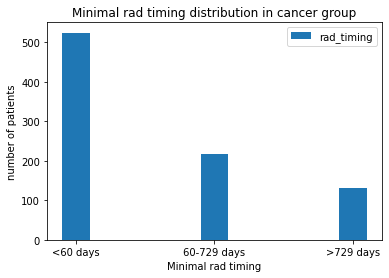

In [16]:
print("latest rad timeing ==>")
print(csaw_df_patient_level['rad_timing'].value_counts())
rad_timing_label_list = ['<60 days','60-729 days','>729 days']
rad_timing = {
    'ary':[
        csaw_df_patient_level[csaw_df_patient_level.rad_timing == 1].count()[-1],
        csaw_df_patient_level[csaw_df_patient_level.rad_timing == 2].count()[-1],
        csaw_df_patient_level[csaw_df_patient_level.rad_timing == 3].count()[-1]
        ],
    'label':'rad_timing'
}
plot_bar_chart(rad_timing_label_list,[rad_timing],total_width = 0.2,xlabel="Minimal rad timing",ylabel="number of patients", title = "Minimal rad timing distribution in cancer group")

### Exam number distribution in healthy group and cancer group

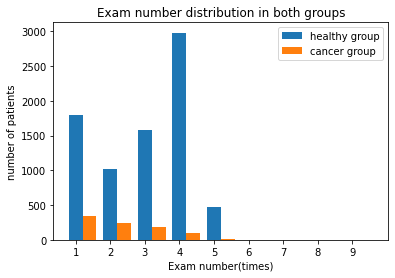

In [17]:
cancer_label_list = ['1','2','3','4','5','6','7','8','9']
healthy = {
    'ary':count_exams(csaw_df_patient_level[csaw_df_patient_level.x_case == 0]),
    'label':'healthy group'
}

cancer = {
    'ary':count_exams(csaw_df_patient_level[csaw_df_patient_level.x_case == 1]),
    'label':'cancer group'
}

plot_bar_chart(cancer_label_list,[healthy, cancer],total_width = 0.8,xlabel="Exam number(times)",ylabel="number of patients", title = "Exam number distribution in both groups")

### Exam number distribution in different groups of minimal rad time

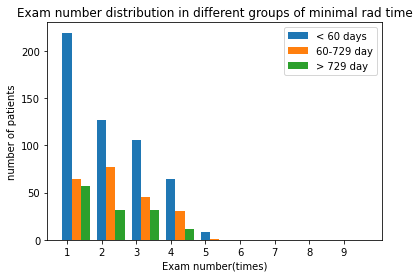

In [18]:
cancer_label_list = ['1','2','3','4','5','6','7','8','9']
rad_1 = {
    'ary':count_exams(csaw_df_patient_level[(csaw_df_patient_level.x_case == 1) & (csaw_df_patient_level.rad_timing == 1)]),
    'label':'< 60 days'
}

rad_2 = {
    'ary':count_exams(csaw_df_patient_level[(csaw_df_patient_level.x_case == 1) & (csaw_df_patient_level.rad_timing == 2)]),
    'label':'60-729 day'
}

rad_3 = {
    'ary':count_exams(csaw_df_patient_level[(csaw_df_patient_level.x_case == 1) & (csaw_df_patient_level.rad_timing == 3)]),
    'label':'> 729 day'
}

plot_bar_chart(cancer_label_list,[rad_1,rad_2,rad_3],total_width = 0.8,xlabel="Exam number(times)",ylabel="number of patients", title = "Exam number distribution in different groups of minimal rad time")

### Study durations distribution in healthy group and cancer group

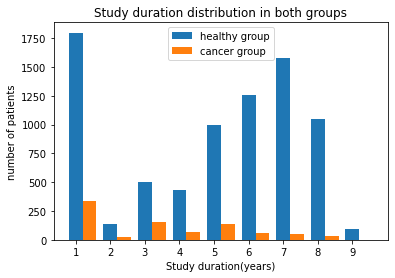

In [19]:
cancer_label_list = ['1','2','3','4','5','6','7','8','9']
healthy = {
    'ary':count_durations(csaw_df_patient_level[csaw_df_patient_level.x_case == 0]),
    'label':'healthy group'
}

cancer = {
    'ary':count_durations(csaw_df_patient_level[csaw_df_patient_level.x_case == 1]),
    'label':'cancer group'
}

plot_bar_chart(cancer_label_list,[healthy, cancer],total_width = 0.8,xlabel="Study duration(years)",ylabel="number of patients", title = "Study duration distribution in both groups")

### Study durations distribution in different groups of minimal rad time

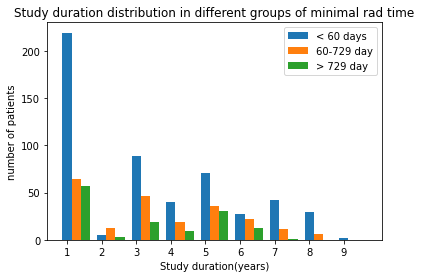

In [20]:
cancer_label_list = ['1','2','3','4','5','6','7','8','9']
rad_1 = {
    'ary':count_durations(csaw_df_patient_level[(csaw_df_patient_level.x_case == 1) & (csaw_df_patient_level.rad_timing == 1)]),
    'label':'< 60 days'
}

rad_2 = {
    'ary':count_durations(csaw_df_patient_level[(csaw_df_patient_level.x_case == 1) & (csaw_df_patient_level.rad_timing == 2)]),
    'label':'60-729 day'
}

rad_3 = {
    'ary':count_durations(csaw_df_patient_level[(csaw_df_patient_level.x_case == 1) & (csaw_df_patient_level.rad_timing == 3)]),
    'label':'> 729 day'
}

plot_bar_chart(cancer_label_list,[rad_1,rad_2,rad_3],total_width = 0.8,xlabel="Study duration(years)",ylabel="number of patients", title = "Study duration distribution in different groups of minimal rad time")